# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

## Initial Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 Stuff

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

![Questions 1.1-1.3](images/hpb2gv-q1.1-1.3.jpg)

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 

Answer: 

I'll answer this question in two parts. Firstly, "Is a non-decreasing transformation of the median the median of the transformed variable?" I think the answer to this is that it depends on the set. So, if it is a set with an odd number of elements, then the non-decreasing transformation of the median should be equal the median of the transformed variable. This is because the median value should literally be one of the data points, so the values of the "non-decreasing transformation of the median" and the "median of the transformation variable" should be exactly equal. Now, notice I specified a set with an odd number of elements. I thought about it for a bit and realized though that this property does not necessarily hold for a set with an even number of elements AND where the transformation is non-linear. This is because medians for an even number of elements is calculated via the average between the two middle-most elements. If it is a linear transformation (take $2+5 \times X$), we have already proved that $m(a+bX) = a + b \times m(X)$, and thus the medians should match up. Let's say that we have a set of [1,3]. The median of this is 2. If we were to transform these elements with $2 + 5 \times X$, we would then have the set of [7, 17]. The median of this is now 12, and applying the same transformation to the old median, we would similarly get 12. However, in the example of a non-linear transformation (like arcsinh), this no longer holds. [arcsinh(1), arcsinh(3)]'s median ends up being about 1.35, but arcsinh(2) is actually about 1.44. Thus, my conclusion and observation is that this property is only true IFF we are either dealing with a linear transformation (which should work regardless of element size) or have an odd number of elements (as an even number of elements does not work with a non-linear transformation).

To answer the second part, I think this answer should apply to the quantiles and the range, as the quantiles are calculated via the "median" of the lower/upper halves of the data. However, in trying to answer this question, when I tried to see if the IQR held these properties, I found that it didn't even hold for a linear transformation of an odd number of elements. I tested [1,2,3,4,5] with the same linear transformation from earlier of $2 + 5 \times X$ - the transformed set is [7,12,17,22,27]. For the regular set the IQR is 3, while the IQR of the transformed set is 15. Well... applying the transformation on the IQR of 3 results in a value of 17, which is NOT the same as the IQR of the transformed set. This is similar to the range - the range of the original set is 4, while the range of the transformed set is 20. Now, it may be coincidence so I won't make any definitive conclusion here, but it seems for linear transformations, the range and IQR are only affected by the multiplicative factor and not any additional factors (that is, in $2 + 5 \times X$ only the $5$ affects the range and IQR). Again, no definitive conclusion here, but I can at lesat confidently say that my answer does not hold for the IQR or range due to the existence of this counter-example.

Whew. That was too long :(

5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Answer:

Intuitively, straight from the start I'm gonna say no because of the work I did for 1.4 above. Let's prove it though with a counter-example. Let's take the linear transformation... you guessed it... $2 + 5 \times X$. I'm gonna tweak the set from [1,2,3,4,5] to instead be [1,2,4,7,9]. The biggest reason is just so that the average is no longer the median, so there's no weird potential interaction here. In any case, the mean here is 4.6. The transformed set is [7, 12, 22, 37, 47]. The mean of that is 25. So now let's do our transformation on the old mean, which actually does end up being 25! That's kinda surprising.

 Okay. Let's get serious and try a non-linear transformation (arcsinh). Same set - [1,2,4,7,9], and the transformed set ends up being [arcsinh(1),arcsinh(2),arcsinh(4),arcsinh(7),arcsinh(9)]. Again, the old mean is 4.6, and so we need the transformed set's mean to be equal to arcsinh(4.6). Let's see if this is true through code:

In [3]:
transformed_set = np.arcsinh([1,2,4,7,9])
transformed_mean = np.mean(transformed_set)
arcsinh_of_old_mean = np.arcsinh(4.6)
print(f'g(m(X)) = {arcsinh_of_old_mean} and m(g(X)) = {transformed_mean}')

g(m(X)) = 2.2308141790009324 and m(g(X)) = 1.991457271280791


And as we see, they're different. So no, it is not always true that $m(g(X))= g(m(X))$, because I just proved with a counter-example that it's not.

## Q2 Stuff

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

### Q2.1

In [4]:
airbnb_df = pd.read_csv('./data/airbnb_hw.csv')

### Q2.2

In [5]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [6]:
airbnb_df.shape

(30478, 13)

So to answer the questions in order: \
**What are the dimensions of the data?** - 30478 rows, 13 columns \
**How many observations are there?** - 30478 \
**What are the variables included?** - Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating; basically, host information, property information, and reviews/price logistics.

In [7]:
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


### Q2.3

In [8]:
pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'], dropna=False)

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa,NaN
Room Type,,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4,2
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4,1
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0,0


There are a couple trends here. Firstly, there are a TON of apartment listings that end up making the majority of the airbnb listings data. Another pattern is that there are more entire apartments than simply just private rooms, but for Bed & Breakfast and House there seem to be more private rooms than entire homes (which make sense). There don't seem to be that many shared rooms for any property type, which makes sense since those are often undesirable. Beyond this, there aren't any super obvious patterns as Apartment & House listings seem to dominate the airbnb listing market.

As noted earlier, private rooms are more common than renting the whole property for Bed & Breakfast's and House. Some smaller (but still notable ones) include Dorm, Castle, Other, and Tent as having more private rooms (but many of these also make a lot of sense).

### Q2.4

So... as we already know from the wrangling assignment, the `Price` column in this dataset has the issue that there are values with commas in them to denote numbers greater than 999! Thus, I'm going to go ahead and do exactly what I did from the wrangling assignment to clean the data before I try plotting the `Price`.

In [9]:
# i literally yoinked these from my wrangling assignment, hope thats okay :)
modified_airbnb_df = airbnb_df.copy()
modified_airbnb_df['Price'] = modified_airbnb_df['Price'].replace({',': ''}, regex=True)
modified_airbnb_df['Price'] = pd.to_numeric(modified_airbnb_df['Price'])

<Axes: >

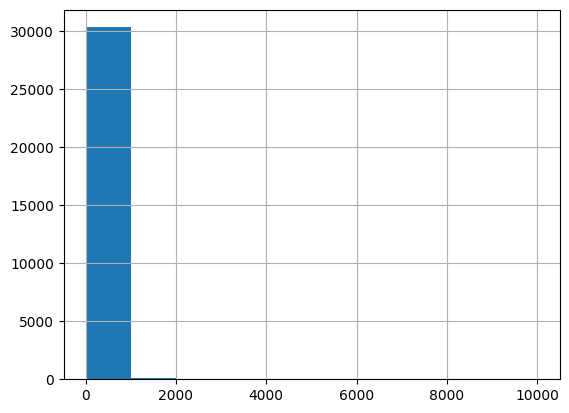

In [10]:
modified_airbnb_df['Price'].hist()

<Axes: ylabel='Density'>

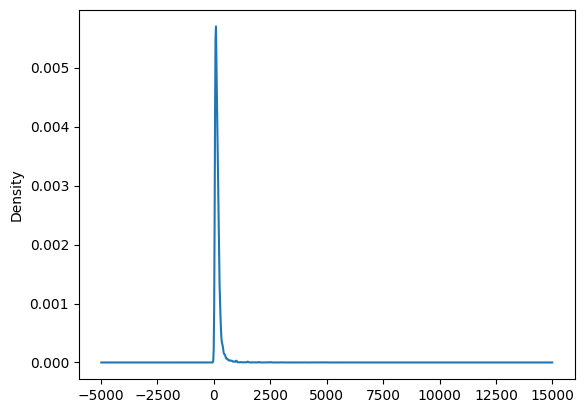

In [11]:
modified_airbnb_df['Price'].plot.density()

<Axes: >

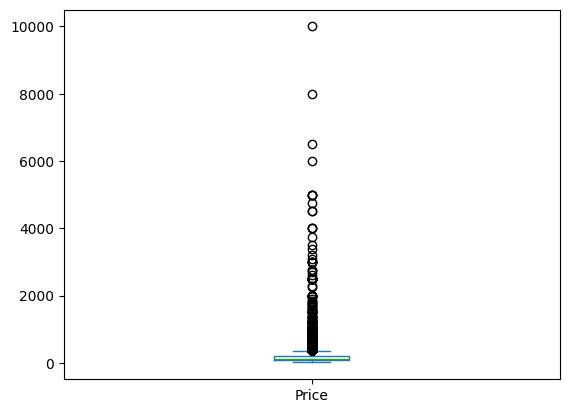

In [12]:
modified_airbnb_df['Price'].plot.box()

In [13]:
modified_airbnb_df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

Yes, the data is scaled extremely poorly. As shown by all three plots, the majority of the data is centralized towards the lower values with a couple outlier high values. This is further supported since the statistical description shows that the mean listing price is 163 with a median of 125 and 75th percentile of 195, but the maximum highest price in here is actually 10000. It's even more evident by the box plot that these values are extremely poorly scaled. Let's fix that by enforcing logs!

In [14]:
price_log = np.log(modified_airbnb_df['Price'])

<Axes: >

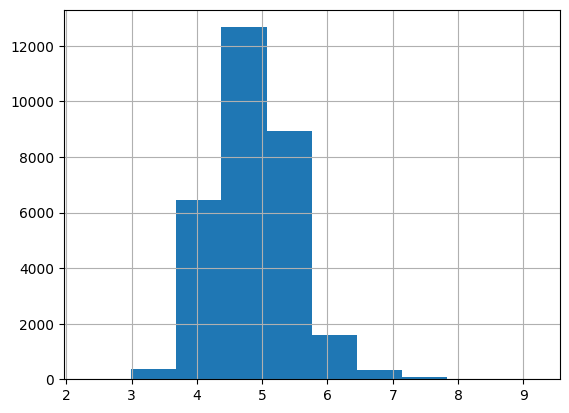

In [15]:
price_log.hist()

<Axes: ylabel='Density'>

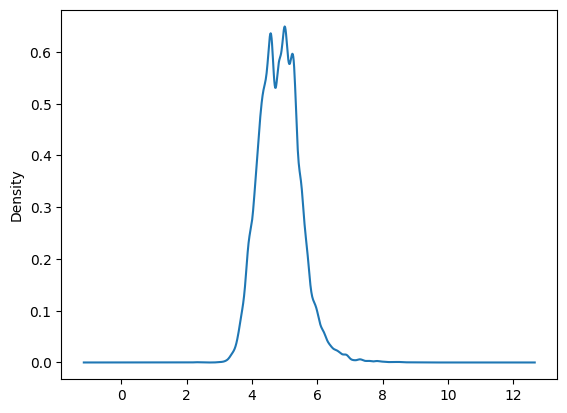

In [16]:
price_log.plot.density()

<Axes: >

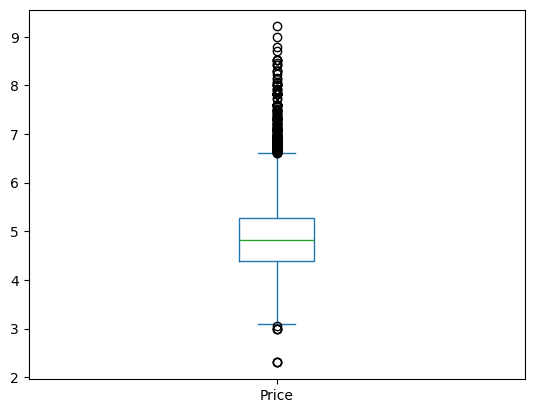

In [17]:
price_log.plot.box()

In [18]:
price_log.describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price, dtype: float64

The log of the data looks much much better! Now it is scaled to a degree that doesn't look absolutely terrible. Yes, there are a lot of outliers in the box plot, but at the very least the histogram and kernel density plot both look good.

### Q2.5

In [19]:
modified_airbnb_df['price_log'] = price_log

<Axes: xlabel='price_log', ylabel='Beds'>

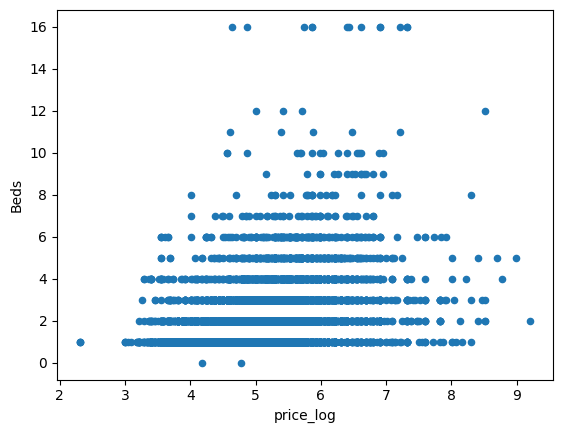

In [20]:
modified_airbnb_df.plot.scatter(x='price_log', y='Beds')

To be honest, it's pretty difficult to actually have super meaningful analysis here since the price has been logarithmically transformed, but basically what I'm seeing is a small trend where lower priced listings have less beds, and then as we get to the middle portion of the scaled pricing there tends to be listings with more beds on top of the less beds listings, and then a slight trend where if we get even more expensive for scaled pricing there tends to be less beds again. There are a few outliers where there are listings with a lot of beds, with somehow no data points with 14 beds. There seems to be super dense clumps for the 1/2/3 bed listings around the 4-5 `price_log` region.

In [21]:
modified_airbnb_df['price_log'].groupby(modified_airbnb_df['Beds']).describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


So for the means, it seems that there is a trend where the mean of the price_log increases as the number of beds does. This makes a lot of sense, as less beds tend to generally be cheaper on airbnb (and typically may even indicate a smaller arrangement). As for the standard deviation, the amount of variability also trends to increase as the number of beds increase. A potential no-substance theoretical reason for this could be that with smaller bed counts they're typically run of the mill listings that tend to be priced about the same for competitive reasons, hence the low variability, but with higher bed counts they're more unique listings that might have special features which propagate higher variability in the prices.

### Q2.6

Ok based on this question it looks like you HAVE to make this plot with seaborn because the notebook provided for EDA only shows colors with seaborn.

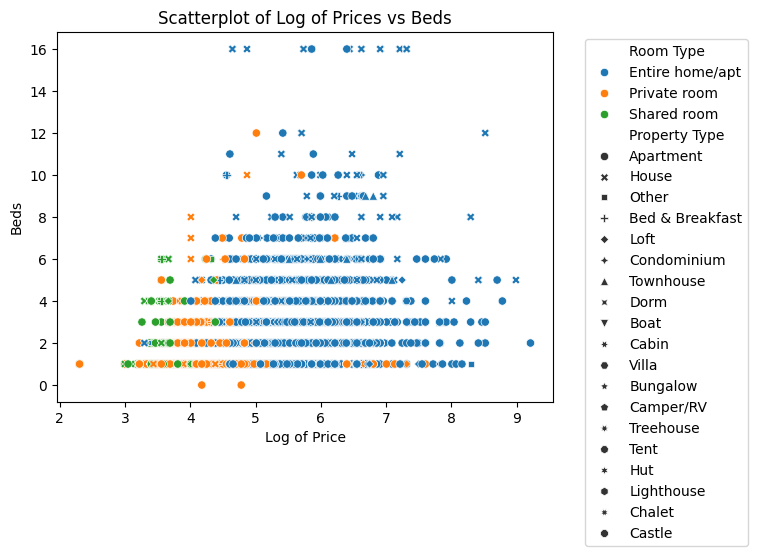

In [22]:
# gonna add a title because seaborn is goated and makes it easier than this stupid built-in pandas plotting thing
this_plot = sns.scatterplot(data=modified_airbnb_df, x='price_log', y='Beds', hue=modified_airbnb_df['Room Type'], style=modified_airbnb_df['Property Type']).set(title='Scatterplot of Log of Prices vs Beds', xlabel='Log of Price', ylabel='Beds')
# I also gotta move this legend because it's cutting off the graph and that looks really bad
plt.legend(bbox_to_anchor=(1.05, 1))

Honestly, this graph is super hard to read because there are such an ungodly number of property types here, so it's hard to comment regarding property types. However, there is an obvious trend for the room type. There are three clear clumps - on the cheapest side of the `price_log` spectrum is where most of the shared room listings are, which makes sense as shared rooms are cheap due to their shared space. Then, a little bit more expensive, there are the private room listings, which are more expensive than the shared rooms for obvious reasons. Finally, there's the entire homes as the last blob, which tend to run a range of more expensive. A lot of the listings also seem to be circle based, which mostly indicate Apartments (with a few house "X's" sprinkled throughout).

In [23]:
modified_airbnb_df.loc[:, ['Room Type', 'Property Type', 'Price']].groupby(['Room Type', 'Property Type']).describe()

Price                                  \
                                   count        mean          std    min   
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.0

For the room types, it definitely seems like the entire home/apt listings have the highest prices on average in general. This observation is supported by the scatterplot as well so I think it is correct. As for the property type, other listings immediately stick out as being high priced on average between all three of the room types. This makes sense as Other properties are probably special properties. For entire home/apt listings specifically, the most expensive include villas, townhouses, and condos. Unsurprisingly, the Other property type is once again also the highest standard deviation. For entire home/apt listings specifically, houses, lofts, and villas also tend to have the highest standard deviation for price variability.

In this case, I want to say that it depends on the category. I think though that for the most part there are not too many outliers for each property type (unless the property type, by nature has varied prices due to unique factors), and so mean would probably be the better estimate of central tendency here. That being said though, the median definitely is a better measure of central tendency for data with heavy outliers (maybe like the Other property type?) so I think again it really depends on the category (particularly property type) we're interested in exploring.

## Q3 Stuff

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

### Q3.1

In [24]:
drillrig_df = pd.read_csv('./data/drilling_rigs.csv')

In [25]:
drillrig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

So to answer the questions:
- How many observations? 
  - 623.
- How many variables? 
  - 10.
- Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? 
  - Well, given the column names, there are a couple of numeric variables (the ones with "Number of Rigs") that were read in as objects. Thus, most likely they'll need to be typecasted and coerced.
- Explain clearly how these data need to be cleaned.
  - To answer this, let's see why they were read in as objects instead of ints. We'll start with the `Month` and see if that's just a number or if that's literally like, "January" "February" etc. or like a datetime (in which case, object is fine).

In [26]:
drillrig_df['Month'].unique()

array(['1973 January', '1973 February', '1973 March', '1973 April',
       '1973 May', '1973 June', '1973 July', '1973 August',
       '1973 September', '1973 October', '1973 November', '1973 December',
       '1974 January', '1974 February', '1974 March', '1974 April',
       '1974 May', '1974 June', '1974 July', '1974 August',
       '1974 September', '1974 October', '1974 November', '1974 December',
       '1975 January', '1975 February', '1975 March', '1975 April',
       '1975 May', '1975 June', '1975 July', '1975 August',
       '1975 September', '1975 October', '1975 November', '1975 December',
       '1976 January', '1976 February', '1976 March', '1976 April',
       '1976 May', '1976 June', '1976 July', '1976 August',
       '1976 September', '1976 October', '1976 November', '1976 December',
       '1977 January', '1977 February', '1977 March', '1977 April',
       '1977 May', '1977 June', '1977 July', '1977 August',
       '1977 September', '1977 October', '1977 November', '1

Yeah `Month` is fine. There's no fixing that. Let's see if maybe the object number of rigs columns are like, > 999 like before?

In [27]:
drillrig_df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'].unique()

array(['Not Available', '626', '713', '727', '746', '663', '575', '582',
       '567', '562', '554', '568', '565', '512', '518', '490', '507',
       '455', '392', '407', '427', '431', '423', '432', '437', '460',
       '493', '532', '541', '514', '492', '478', '484', '498', '497',
       '506', '566', '588', '615', '643', '633', '564', '520', '469',
       '430', '483', '472', '451', '433', '457', '400', '378', '381',
       '370', '358', '343', '349', '334', '345', '418', '397', '335',
       '311', '315', '320', '323', '350', '368', '441', '453', '425',
       '356', '337', '314', '331', '341', '325', '342', '361', '354',
       '326', '322', '328', '301', '327', '333', '332', '330', '295',
       '283', '286', '288', '298', '290', '297', '363', '377', '373',
       '379', '396', '382', '409', '390', '380', '291', '272', '267',
       '264', '226', '215', '214', '190', '155', '125', '117', '114',
       '136', '124', '108', '111', '130', '137', '145', '161', '143',
       '147', '17

OHHHH... IT'S 100% BECAUSE OF THE NOT AVAILABLE. We can fix that easy! Let me just check the others and also confirm this issue persists across the remaining columns.

In [28]:
drillrig_df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'].unique()

array(['Not Available', '352', '364', '377', '386', '403', '391', '375',
       '338', '316', '300', '309', '335', '390', '406', '397', '347',
       '325', '322', '311', '357', '438', '484', '482', '498', '517',
       '477', '412', '421', '447', '465', '495', '496', '466', '460',
       '469', '413', '405', '389', '374', '354', '342', '332', '326',
       '314', '330', '328', '308', '294', '277', '250', '251', '260',
       '310', '331', '356', '399', '451', '509', '454', '334', '268',
       '270', '327', '360', '411', '408', '426', '425', '398', '382',
       '415', '433', '471', '467', '336', '414', '430', '427', '446',
       '488', '505', '499', '489', '478', '492', '518', '526', '541',
       '577', '584', '581', '614', '602', '625', '648', '609', '589',
       '601', '591', '580', '585', '549', '565', '559', '519', '491',
       '461', '371', '380', '434', '527', '635', '636', '632', '616',
       '600', '645', '677', '733', '779', '810', '842', '832', '854',
       '879', '89

In [29]:
drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'].unique()

array(['Not Available', '102', '100', '88', '72', '61', '75', '70', '64',
       '69', '71', '65', '59', '54', '51', '57', '60', '58', '56', '50',
       '48', '46', '44', '55', '52', '45', '38', '49', '47', '53', '62',
       '67', '63', '68', '73', '76', '41', '36', '30', '35', '43', '40',
       '32', '33', '42', '74', '82', '83', '86', '77', '66', '87', '94',
       '91', '93', '98', '97', '105', '119', '130', '133', '147', '127',
       '126', '128', '134', '144', '156', '165', '171', '177', '183',
       '192', '198', '208', '209', '220', '235', '250', '257', '274',
       '286', '304', '309', '320', '308', '328', '335', '346', '342',
       '355', '374', '377', '398', '430', '433', '427', '440', '454',
       '447', '459', '485', '494', '527', '551', '568', '602', '631',
       '635', '610', '553', '486', '432', '401', '379', '384', '425',
       '468', '522', '562', '617', '665', '708', '751', '779', '819',
       '856', '891', '910', '919', '941', '958', '968', '982', '983',
 

In [30]:
drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'].unique()

array(['Not Available', '96', '124', '122', '126', '115', '106', '97',
       '90', '91', '89', '92', '100', '99', '88', '80', '76', '66', '74',
       '81', '87', '102', '109', '118', '120', '129', '131', '135', '134',
       '136', '133', '144', '142', '137', '139', '143', '145', '150',
       '153', '152', '159', '156', '155', '154', '174', '157', '149',
       '163', '178', '180', '194', '189', '172', '162', '193', '197',
       '195', '206', '218', '235', '228', '219', '225', '229', '236',
       '251', '248', '224', '222', '199', '184', '167', '147', '169',
       '177', '191', '198', '209', '215', '237', '242', '234', '256',
       '262', '263', '274', '288', '309', '311', '304', '299', '291',
       '277', '254', '232', '223', '213', '245', '230', '216', '220',
       '238', '240', '271', '270', '273', '285', '282', '275', '290',
       '296', '289', '284', '314', '331', '322', '335', '342', '319',
       '343', '345', '315', '329', '355', '349', '344', '351', '356',
       '36

In [31]:
drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'].unique()

array(['Not Available', '870', '761', '715', '659', '633', '677', '668',
       '632', '609', '634', '652', '643', '559', '519', '497', '486',
       '490', '483', '540', '554', '602', '680', '755', '788', '689',
       '553', '494', '484', '502', '549', '592', '637', '684', '696',
       '673', '613', '573', '551', '537', '539', '574', '591', '583',
       '612', '629', '620', '558', '526', '481', '489', '478', '529',
       '543', '560', '568', '505', '513', '528', '563', '587', '588',
       '571', '599', '586', '619', '630', '658', '698', '682', '691',
       '708', '704', '700', '719', '695', '627', '594', '582', '572',
       '545', '515', '479', '448', '394', '358', '337', '316', '330',
       '366', '393', '453', '496', '522', '589', '611', '645', '688',
       '734', '759', '751', '781', '795', '805', '816', '843', '877',
       '892', '817', '757', '670', '536', '485', '480', '544', '546',
       '561', '566', '562', '579', '614', '639', '675', '694', '710',
       '714', '70

In [32]:
drillrig_df['Active Well Service Rig Count (Number of Rigs)'].unique()

array(['1549', '1677', '1805', '1898', '1991', '1994', '1997', '2112',
       '2227', '2247', '2266', '2334', '2401', '2436', '2470', '2513',
       '2555', '2525', '2494', '2483', '2473', '2488', '2503', '2543',
       '2582', '2549', '2568', '2374', '2426', '2344', '2369', '2459',
       '2434', '2505', '2675', '2612', '2490', '2521', '2597', '2575',
       '2607', '2606', '2656', '2652', '2639', '2601', '2660', '2474',
       '2628', '2695', '2804', '2760', '2895', '2929', '2942', '2964',
       '2973', '2968', '2898', '2810', '2906', '2899', '2997', '2996',
       '2987', '3006', '3089', '3073', '3078', '2958', '3063', '3094',
       '2698', '2765', '3034', '3369', '3506', '3572', '3621', '3673',
       '3954', '3795', '3709', '3855', '3923', '4010', '3871', '4032',
       '4112', '4092', '4155', '4277', '4290', '4281', '4172', '4209',
       '4359', '4238', '4430', '4749', '5093', '5172', '5196', '5150',
       '5142', '5165', '5279', '5367', '5220', '4808', '4334', '4328',
      

Yep, all of them have this 'Not Available' thing. Thank GOD. I love whoever recorded this data. So to clean it, this is super easy - we'll just coerce all errors in our conversion to numeric for each column, which SHOULD make the 'Not Available' entries NaNs instead!

In [35]:
modified_drillrig_df = drillrig_df.copy()
modified_drillrig_df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
modified_drillrig_df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce')
modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce')
modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce')
modified_drillrig_df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(modified_drillrig_df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

Was there probably a better way to do that? Yes. Did I end up figuring out how to do it? Nah. Anyway, let's take a look at the info NOW!

In [36]:
modified_drillrig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Month                                                                                        623 non-null    object 
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64  
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64  
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64
 5   Crude Oil and Natural Gas Rotary Rig

In [47]:
modified_drillrig_df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'].unique()

array([  nan,  626.,  713.,  727.,  746.,  663.,  575.,  582.,  567.,
        562.,  554.,  568.,  565.,  512.,  518.,  490.,  507.,  455.,
        392.,  407.,  427.,  431.,  423.,  432.,  437.,  460.,  493.,
        532.,  541.,  514.,  492.,  478.,  484.,  498.,  497.,  506.,
        566.,  588.,  615.,  643.,  633.,  564.,  520.,  469.,  430.,
        483.,  472.,  451.,  433.,  457.,  400.,  378.,  381.,  370.,
        358.,  343.,  349.,  334.,  345.,  418.,  397.,  335.,  311.,
        315.,  320.,  323.,  350.,  368.,  441.,  453.,  425.,  356.,
        337.,  314.,  331.,  341.,  325.,  342.,  361.,  354.,  326.,
        322.,  328.,  301.,  327.,  333.,  332.,  330.,  295.,  283.,
        286.,  288.,  298.,  290.,  297.,  363.,  377.,  373.,  379.,
        396.,  382.,  409.,  390.,  380.,  291.,  272.,  267.,  264.,
        226.,  215.,  214.,  190.,  155.,  125.,  117.,  114.,  136.,
        124.,  108.,  111.,  130.,  137.,  145.,  161.,  143.,  147.,
        173.,  196.,

And now, as we can see everything is now numeric AND we've replaced the 'Not Availble' with np.nan. Fantastic. Just to conclude and make it easier - basically, to clean this data all that needed to happen was to make the data numeric and coerce errors to np.nan!

### Q3.2

Oh, okay. So I was kinda right earlier when I said datetime. Well cool - time to make this a datetime then!

In [48]:
time_modified_drillrig_df = modified_drillrig_df.copy()
time_modified_drillrig_df['Month'] = pd.to_datetime(time_modified_drillrig_df['Month'], format='mixed')

In [50]:
time_modified_drillrig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    datetime64[ns]
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64       
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64

In [49]:
time_modified_drillrig_df['Month'].unique()

<DatetimeArray>
['1973-01-01 00:00:00', '1973-02-01 00:00:00', '1973-03-01 00:00:00',
 '1973-04-01 00:00:00', '1973-05-01 00:00:00', '1973-06-01 00:00:00',
 '1973-07-01 00:00:00', '1973-08-01 00:00:00', '1973-09-01 00:00:00',
 '1973-10-01 00:00:00',
 ...
 '2024-02-01 00:00:00', '2024-03-01 00:00:00', '2024-04-01 00:00:00',
 '2024-05-01 00:00:00', '2024-06-01 00:00:00', '2024-07-01 00:00:00',
 '2024-08-01 00:00:00', '2024-09-01 00:00:00', '2024-10-01 00:00:00',
 '2024-11-01 00:00:00']
Length: 623, dtype: datetime64[ns]

### Q3.3

### Q3.4

### Q3.5